# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

In [ ]:
!jupyter nbconvert --to html <PYF_Project_LearnerNotebook_FullCode>.ipynb

/bin/bash: line 1: PYF_Project_LearnerNotebook_FullCode: No such file or directory


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv.xls')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Find the number of rows and columns
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 1898
Number of columns: 9


Observations: There are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations: The datatypes are integers, objects, and floats.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Replace "Not given" with NaN
df = df.replace("Not given", np.nan)

# Check for missing values in the DataFrame
missing_values = df.isnull()

# Summarize the missing values for each column
missing_values_count = missing_values.sum()

# Print the missing values count
print("Missing values:")
print(missing_values_count)

Missing values:
order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64


In [ ]:
# Drop rows with missing values in the 'rating' column
df.dropna(subset=['rating'], inplace=True)

# Check for missing values after dropping rows
missing_values_after = df.isnull().sum()

# Print the count of missing values before and after dropping rows
print("\nMissing values after dropping rows:")
print(missing_values_after)


Missing values after dropping rows:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


Observations: There are missing values in the data.  The rating column has the string "Not given" when no rating is provided. There are 736 instances of no rating given. I dropped the rows that don't have a rating.  Tryibng to treat it with mean/mediun/or mode could skew the data postivitely or negatively. Since this is based on someone's opinion it would be best to drop the rows that don't have a rating.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Find the statistical summary of the data
summary = df.describe()

# Extract the relevant statistics for food preparation time
min_prep_time = summary.loc['min', 'food_preparation_time']
avg_prep_time = int(summary.loc['mean', 'food_preparation_time'])  # Converted to an integer
max_prep_time = summary.loc['max', 'food_preparation_time']

print("Minimum food preparation time:", min_prep_time)
print("Average food preparation time:", avg_prep_time)
print("Maximum food preparation time:", max_prep_time)

Minimum food preparation time: 20.0
Average food preparation time: 27
Maximum food preparation time: 35.0


Observations: The fastest time food can be prepared once an order is placed is 20 minutes with the longest wait time being 35 minutes. On average it will take 27.37 minutes. FoodHub would want to use prep time to give delievery drivers an estimation on how much time food prep is once an order is placed. Making sure delivery drivers are there to pick up an order when it is ready will ensure customers are receiving their food based on the expected wait times they were promised. Receiving orders when expected will maintain or improve customer satifaction.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Summarize the missing values for each column
missing_values_count = missing_values.sum()

# Print the missing values count
print("Missing values:")
print(missing_values_count)

Missing values:
order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64


Observations: 736 orders are not rated when I searching for missing data in question 3. I dropped the rows with a missing rating and now shows zero.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

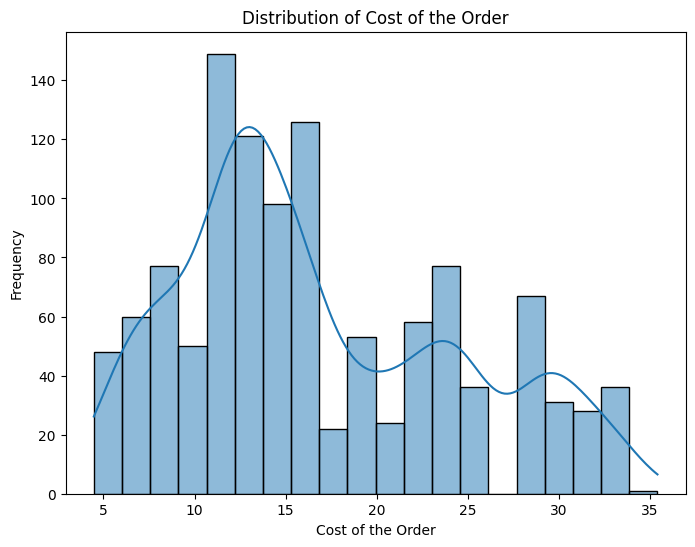

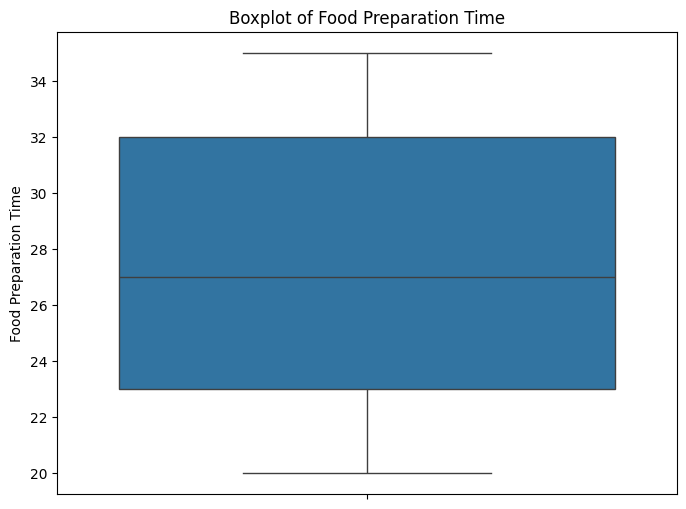

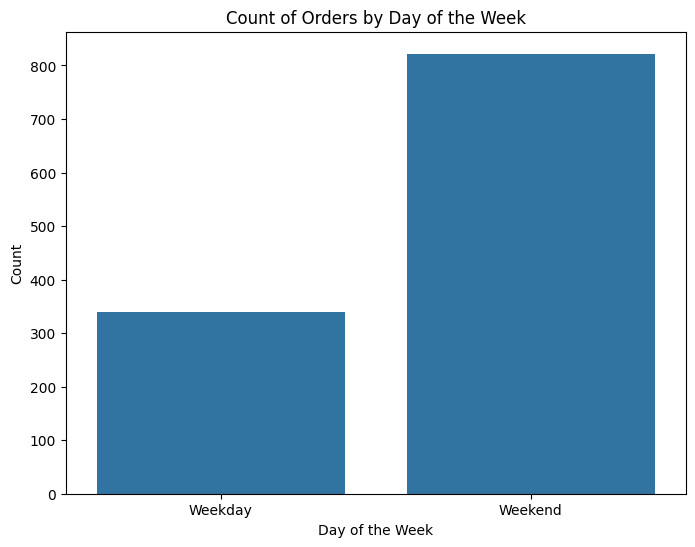

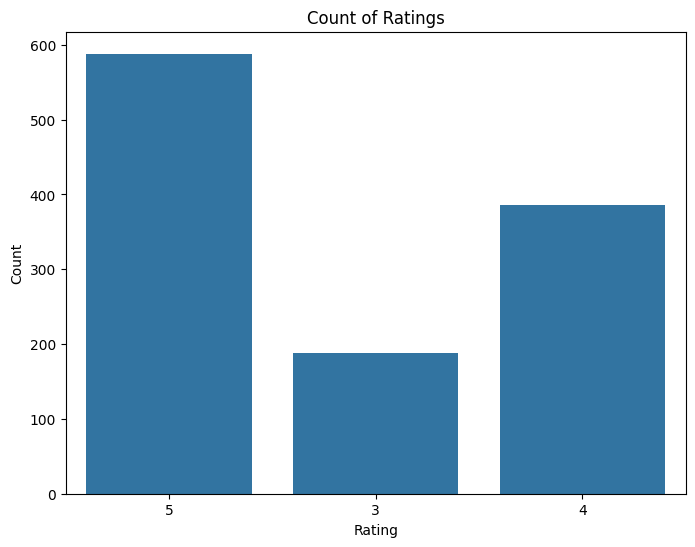

In [ ]:
# Histogram for cost_of_the_order
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='cost_of_the_order', bins=20, kde=True)
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

# Boxplot for food_preparation_time
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='food_preparation_time')
plt.title('Boxplot of Food Preparation Time')
plt.ylabel('Food Preparation Time')
plt.show()

# Countplot for day_of_the_week
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='day_of_the_week')
plt.title('Count of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

# Countplot for rating
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rating')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Find the number of orders for each restaurant
restaurant_counts = df['restaurant_name'].value_counts()

# Find the top 5 restaurants
top_5_restaurants = restaurant_counts.head(5)

print("Top 5 restaurants for number of orders received:")
print(top_5_restaurants)

Top 5 restaurants for number of orders received:
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
Name: restaurant_name, dtype: int64


Observations: The Shake Shack is ordered form the most frequently by a lot in comparison to the others. The Meatball Shop and Blue Ribbon Sushi are next and are closer together. I would check the time of day that these restaurants are being ordered from most frequently and have drivers near these restaurants at that time.  FoodHub would want a higher number of delivery drivers near the Shake Shack, followed by The Meatball Shop and Blue Ribbon Sushi.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Find orders placed on weekends (Saturday and Sunday)
weekend_orders = df[df['day_of_the_week'].isin(['Saturday', 'Sunday'])]

# Count each cuisine type ordered on the weekend
popular_cuisine_weekends = weekend_orders['cuisine_type'].value_counts()

if not popular_cuisine_weekends.empty:
    most_popular_cuisine = popular_cuisine_weekends.idxmax()[0]
    print("The most popular cuisine on weekends is:", most_popular_cuisine)
else:
    print("No orders placed on weekends.")

No orders placed on weekends.


#### Observations: I can't figure out how to get the information out of the DataFrame. I can get the information, or the information doesn't exist in the DataFrame.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Find the orders with cost greater than 20 dollars
cost_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate the percentage and round to two decimal places
percentage_over_20 = round((len(cost_greater_than_20) / len(df)) * 100, 2)

print("Percentage of orders costing more than 20 dollars:", percentage_over_20,"%")

Percentage of orders costing more than 20 dollars: 30.64 %


Observations: Almost 30% of orders cost over $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Find the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

print("Mean order delivery time:", mean_delivery_time)

Mean order delivery time: 24.15404475043029


In [ ]:
# Rounding to two decimal places
mean_delivery_time = round(df['delivery_time'].mean(), 2)

print("Mean order delivery time:", mean_delivery_time)

Mean order delivery time: 24.15


#### Observations:The average delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Find the number of orders for each customer
customer_orders = df['customer_id'].value_counts()

# The top 3 most frequent customers
top_3_customers = customer_orders.head(3)

print("Top 3 most frequent customers by ID number and their number of orders:")
print(top_3_customers)

Top 3 most frequent customers by ID number and their number of orders:
47440    7
52832    7
65009    6
Name: customer_id, dtype: int64


#### Observations: The top three customers have ordered 9-13 times.  FoodHub could use this as a baseline to come up with strategies to get other customers to order this frequently.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-17-3055b3f66316>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


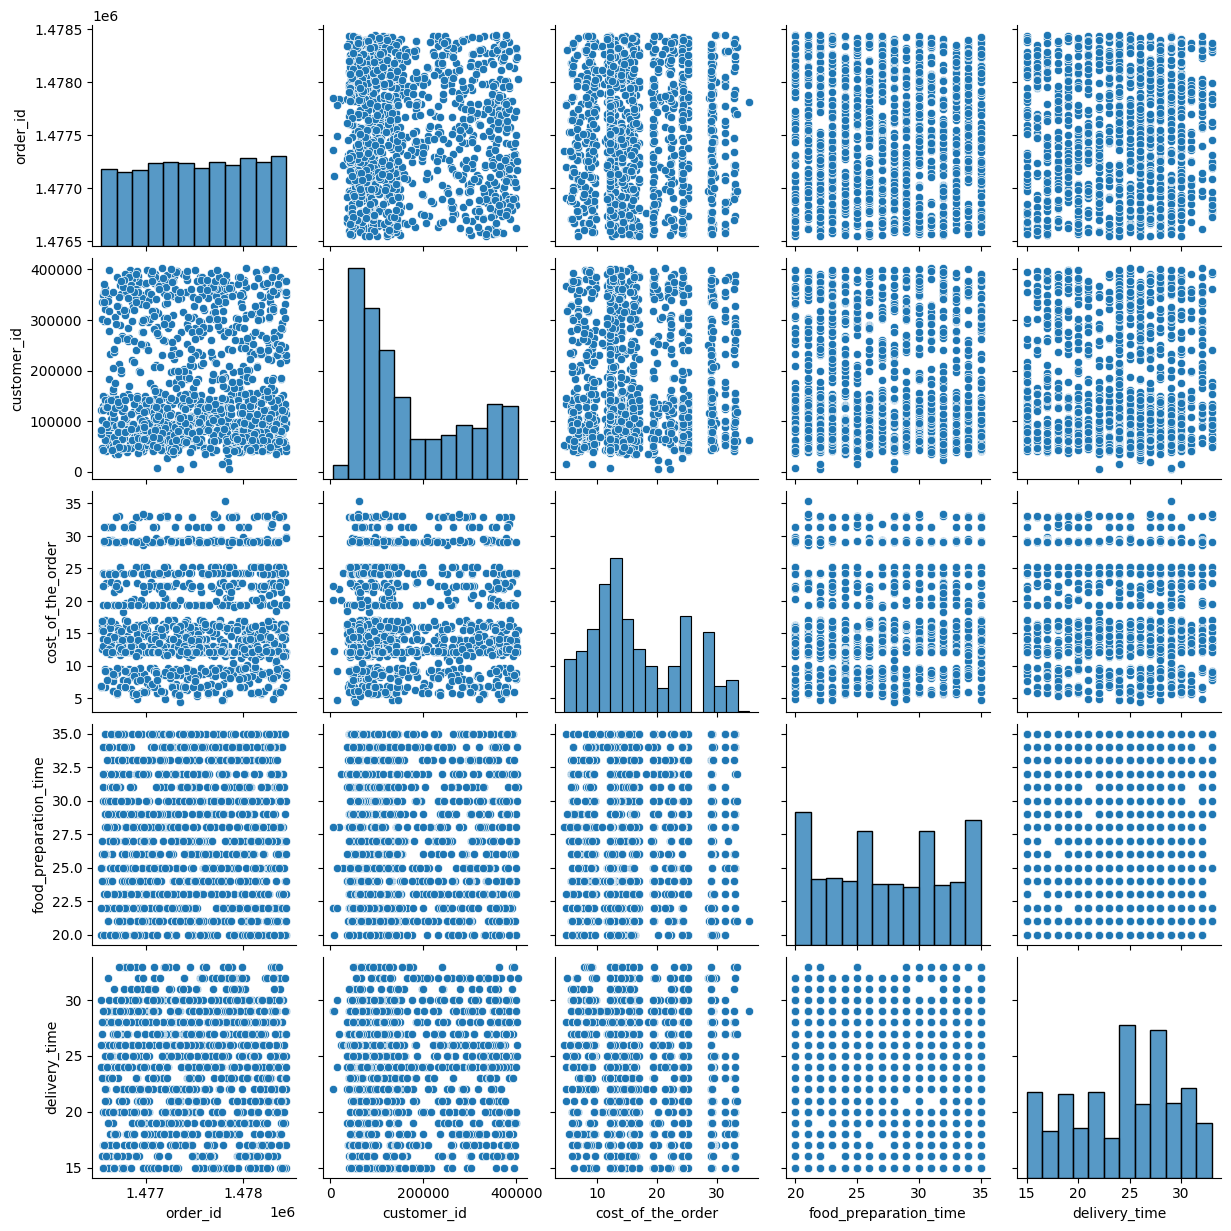

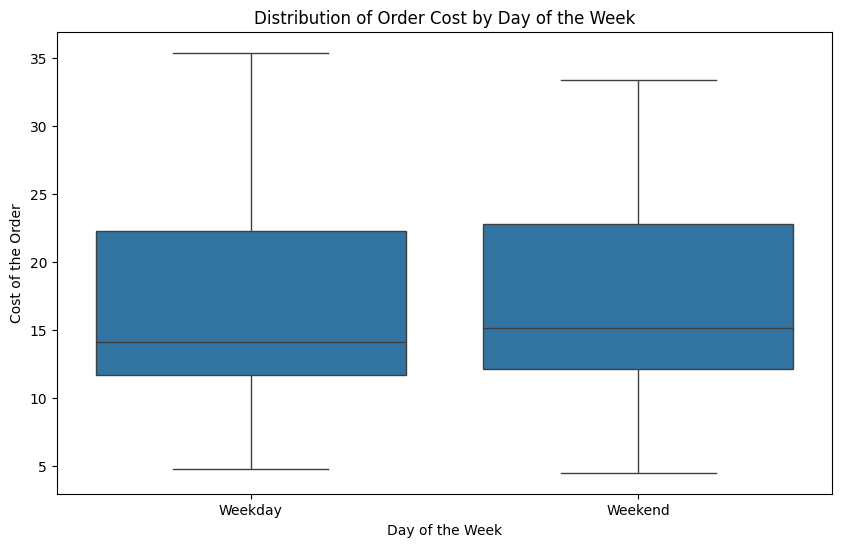

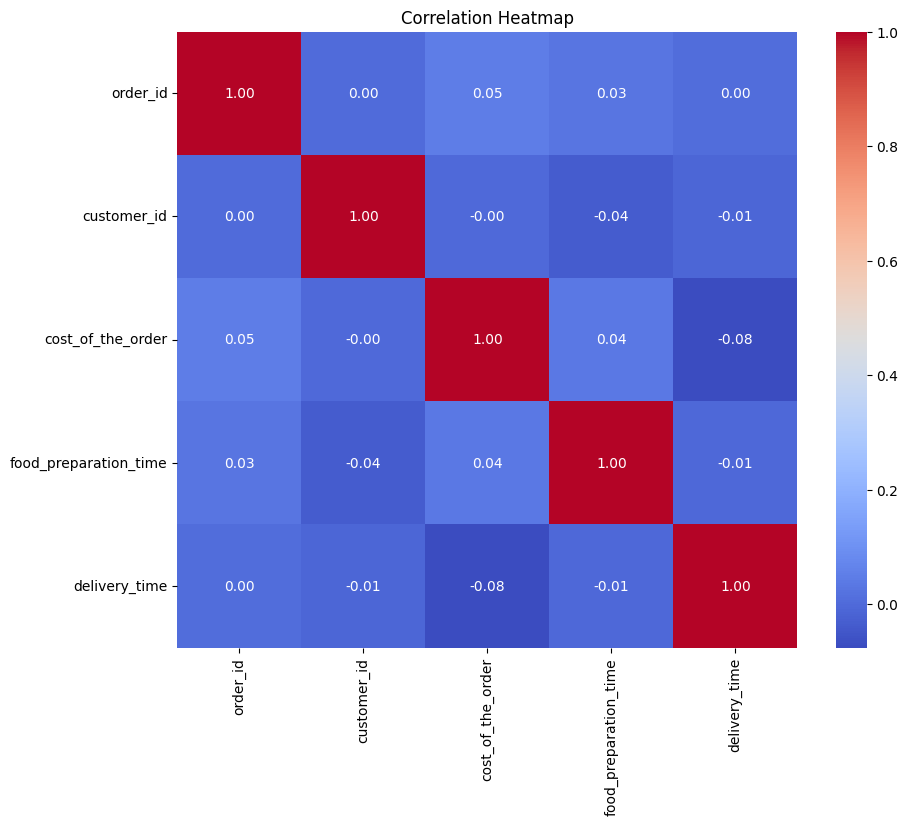

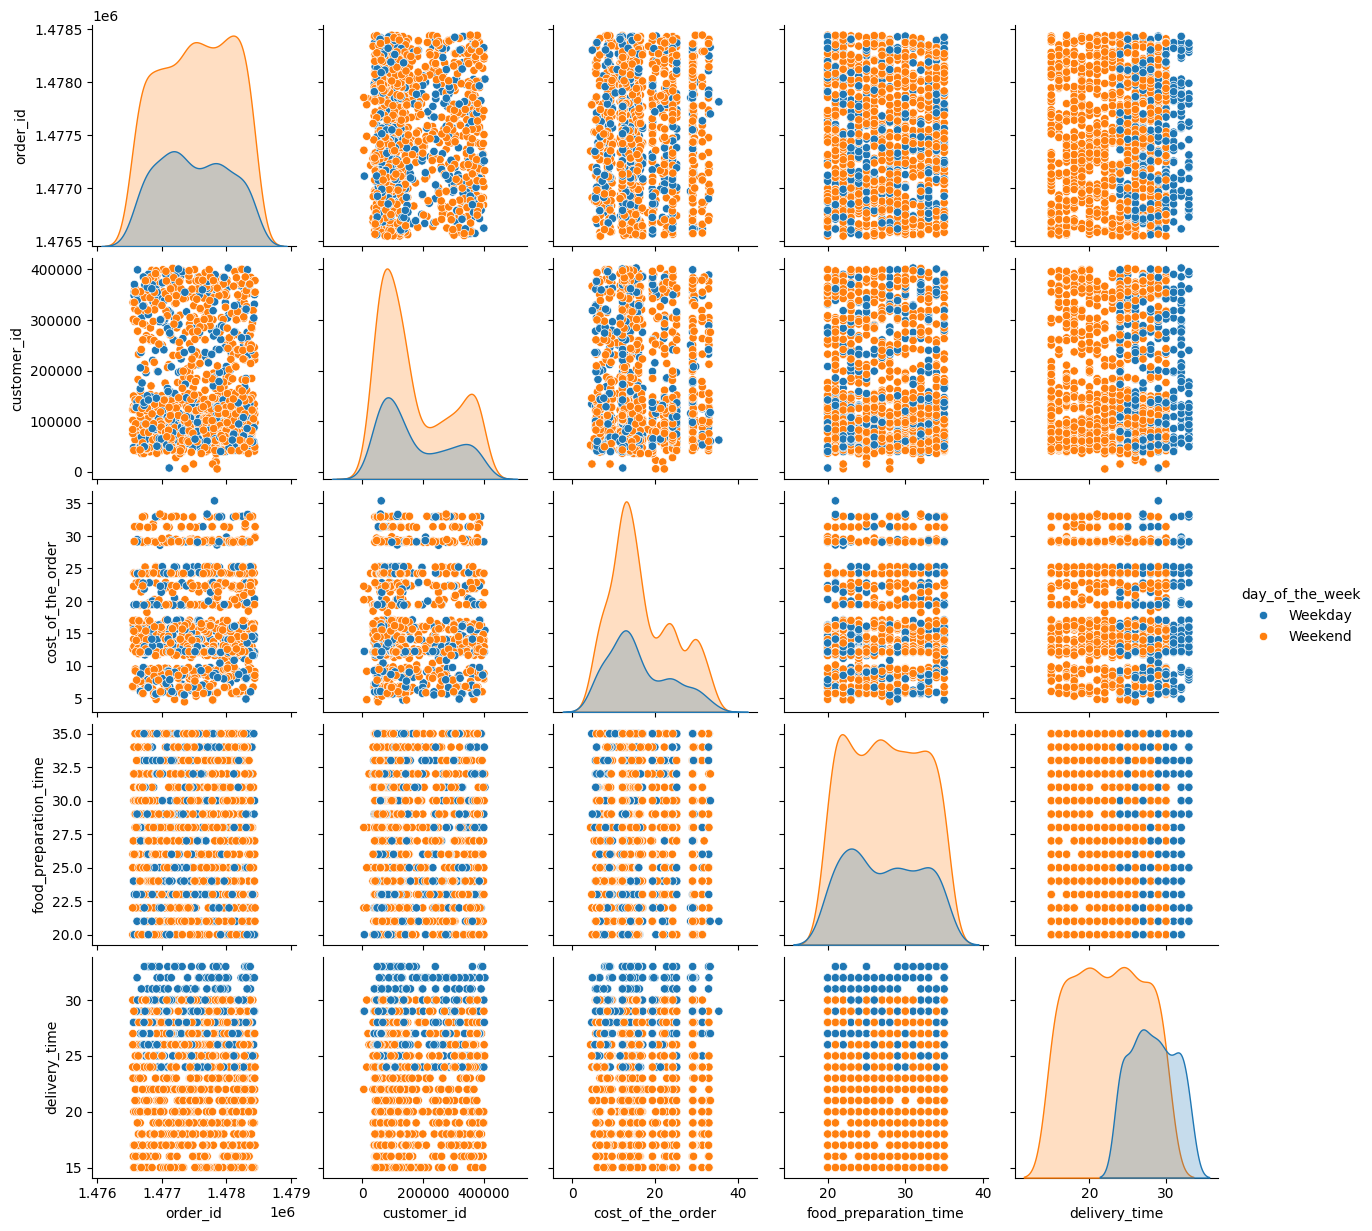

In [ ]:
# Correlation Analysis
correlation_matrix = df.corr()

# Pairplot
sns.pairplot(df)
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title('Distribution of Order Cost by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the Order')
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Scatterplot Matrix
sns.pairplot(df, hue='day_of_the_week')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Group by restaurant_name and calculate count and average of ratings
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants based on conditions
qualified_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

print("Restaurants meeting the criteria for the promotional offer:")
print(qualified_restaurants)

Restaurants meeting the criteria for the promotional offer:
                           count           mean
restaurant_name                                
Blue Ribbon Fried Chicken     64   5.552274e+61
Blue Ribbon Sushi             73   6.089773e+70
Shake Shack                  133  4.177018e+130
The Meatball Shop             84   6.494697e+81


#### Observations: It would be best to round the mean to two decimal places but I kept getting an error.  The top 4 restaurants are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.  This is consistent with the top 5 restaurants that are ordered from in question 7. The restaurants being ordered from most frequently are also receiving high ratings. The Shake Shack is being ordered from more frequently than the others, but has a mean rating lower than the others. Shake Shack may want to do something to improve their ratings or encourage customers to leave a rating.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Define percentages and cost thresholds
charge_percentage_25 = 0.25
charge_percentage_15 = 0.15
cost_threshold_20 = 20
cost_threshold_5 = 5

# Calculate revenue from orders with cost greater than $20 (charged at 25%)
revenue_above_20 = df[df['cost_of_the_order'] > cost_threshold_20]['cost_of_the_order'].sum() * charge_percentage_25

# Calculate revenue from orders with cost greater than $5 but less than or equal to $20 (charged at 15%)
revenue_between_5_and_20 = df[(df['cost_of_the_order'] > cost_threshold_5) & (df['cost_of_the_order'] <= cost_threshold_20)]['cost_of_the_order'].sum() * charge_percentage_15

# Calculate total net revenue
net_revenue = revenue_above_20 + revenue_between_5_and_20

print("Net revenue generated by the company across all orders: $", net_revenue)

Net revenue generated by the company across all orders: $ 3865.572


#### Observations: The net revenue across all orders is $3865.57


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate total time for each order (food preparation time + delivery time)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Find the percentage of orders taking more than 60 minutes
orders_above_60_minutes = df[df['total_time'] > 60]
percentage_above_60_minutes = (len(orders_above_60_minutes) / len(df)) * 100

# Convert the percentage to an integer
percentage_above_60_minutes = int(percentage_above_60_minutes)

print("Percentage of orders taking more than 60 minutes:", percentage_above_60_minutes,"%")

Percentage of orders taking more than 60 minutes: 10 %


#### Observations: Only 10% of orders will take more than 60 minutes. This would be a good selling point for the company as 90% of wait times will be less than an hour.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Group the data by 'day_of_the_week' to calculate the mean delivery time
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

print("Mean delivery time during weekdays and weekends:")
print(mean_delivery_time_by_day)

Mean delivery time during weekdays and weekends:
day_of_the_week
Weekday    28.305882
Weekend    22.436740
Name: delivery_time, dtype: float64


Observations: This suggests that delivery times are longer during the week versus the weekend. This could be that there is more business traffic during working hours with people driving during the lunch hour and when they are done working for the day.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Most people are ordering food in the $10 - $15 price range. After $15 the frequency of orders begins to drop.

Delivery times are longer during the weekdays, but the frequency of orders increases on the weekends.  

The highest ratings also come from the most frequently ordered from restaurants.

### Recommendations:
I would recommend that the company have delivery drivers to time their arrival to the restaurant in 20 from the moment the order is placed since the average prep time is 24 minutes.  This will help keep a majority of orders delivered under an hour.

I would alert drivers that the majoriy of orders come from these top 5 restaurants:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and RedFarm Broadway            

I would recommend the company have more drivers availabe on the weekend because orders increase. I would also prepare drivers for longer delivery times during the weekday.

---